In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_quality = pd.read_csv("wine_quality_white.csv")

In [3]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Each row represents a single wine, and each column represents some property of that wine. Here are some of the interesting columns:

* density -- shows the amount of material dissolved in the wine.
* alcohol -- the alcohol content of the wine.
* quality -- the average quality rating (1-10) given to the wine.

In [5]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Before we get started with linear regression, let's take a look at how to draw lines.

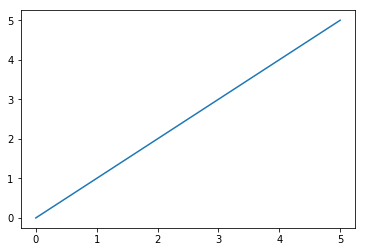

In [6]:
x = [0, 1, 2, 3, 4, 5]
# Going by our formula, every y value at a position is the same as the x-value in the same position.
# We could write y = x, but let's write them all out to make this more clear.
y = [0, 1, 2, 3, 4, 5]

# As you can see, this is a straight line that passes through the points (0,0), (1,1), (2,2), and so on.
plt.plot(x, y)
plt.show()

[1 2 3 4 5 6]


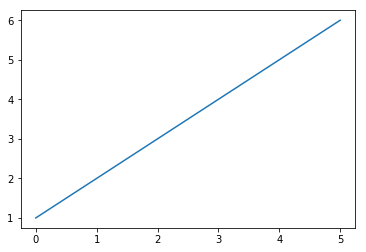

In [7]:
# Let's try a slightly more ambitious line.
# What if we did y = x + 1?
# We'll make x an array now, so we can add 1 to every element more easily.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x + 1

# y is the same as x, but every element has 1 added to it.
print(y)

# This plot passes through (0,1), (1,2), and so on.
# It's the same line as before, but shifted up 1 on the y-axis.
plt.plot(x, y)
plt.show()

# By adding 1 to the line, we moved what's called the y-intercept -- where the line intersects with the y-axis.
# Moving the intercept can shift the whole line up (or down when we subtract).

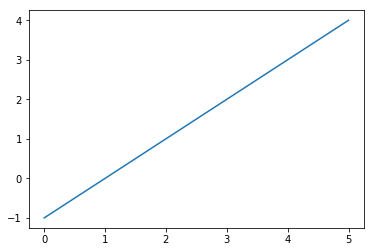

In [8]:
# Plot the equation y=x−1, using the existing x variable.
y = x - 1
plt.plot(x, y)
plt.show()

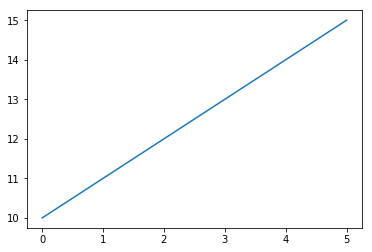

In [9]:
# Plot the equation y=x+10, using the existing x variable.
y = x + 10
plt.plot(x, y)
plt.show()

Now that we have a way to move the line up and down, what about the steepness of the line?

This was unchanged earlier -- the values on the line always went up 1 on the y-axis every time they went up 1 on the x-axis.

What if we want to make a line that goes up 2 numbers on the y-axis every time it goes up 1 on the x-axis?

This is where **slope** comes in. The slope is multiplied by the x-value to get the new y value.

It looks like this: $\Large y = mx$. If we set the slope, $\Large m$, equal to 2, we'll get what we want.

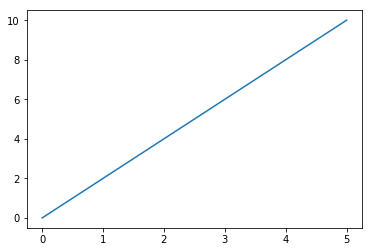

In [10]:
x = np.asarray([0, 1, 2, 3, 4, 5])
# Let's set the slope of the line to 2.
y = 2 * x

# See how this line is "steeper" than before?  The larger the slope is, the steeper the line becomes.
# On the flipside, fractional slopes will create a "shallower" line.
# Negative slopes will create a line where y values decrease as x values increase.
plt.plot(x, y)
plt.show()

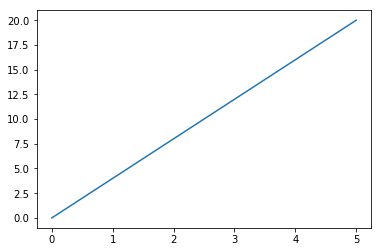

In [11]:
# Plot the equation y=4x, using the existing x variable.
y = 4 * x
plt.plot(x, y)
plt.show()

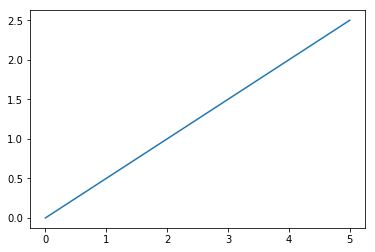

In [12]:
# Plot the equation y=.5x, using the existing x variable.
y = .5 * x
plt.plot(x, y)
plt.show()

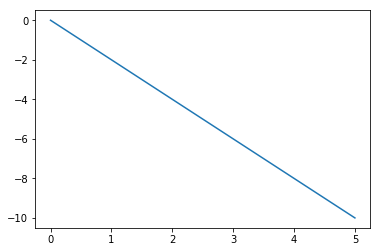

In [13]:
# Plot the equation y=−2x, using the existing x variable.
y = -2 * x
plt.plot(x, y)
plt.show()

In the last mission, we did some work with the r-value. The r-value indicates how correlated two variables are. This can range from no correlation to a negative correlation to a positive correlation.

The more correlated two variables are, the easier it becomes to use one to predict the other. For instance, if I know that how much I pay for my steak is highly positively correlated to the size of the steak (in ounces), I can create a formula that helps me predict how much I would be paying for my steak.

The way we do this is with **linear regression**. Linear regression gives us a formula. If we plug in the value for one variable into this formula, we get the value for the other variable.

The equation to create the formula takes the form $\Large y = mx + b$.

You might recognize pieces of this equation from the past two screens -- we're just adding the **intercept** and **slope** into one equation.

This equation is saying "the predicted value of **the second variable (y)** is equal to the value of **the first variable (x)** times **the slope (m)** plus **the intercept (b)**".

We have to calculate values for $\Large m$ and $\Large b$ before we can use our formula.

We'll calculate slope first -- the formula is $\Large\frac{cov(x,y)}{\sigma_{x}^{2}}$, which is just the covariance of x and y divided by the variance of x.

We can use the **cov** function to calculate covariance, and the **.var()** method on Pandas series to calculate variance.

In [14]:
# Calculate the slope you would need to predict the "quality" column (y) using the "density" column (x).
# Assign the slope to slope_density.
cov_matrix = np.cov(wine_quality["density"], wine_quality["quality"])
slope_density = cov_matrix[0,1]/cov_matrix[0,0]

print("cov_matrix =",cov_matrix)
print("slope_density =",slope_density)

cov_matrix = [[  8.94552419e-06  -8.13527438e-04]
 [ -8.13527438e-04   7.84355685e-01]]
slope_density = -90.9423999421


Now that we can calculate the slope for our linear regression line, we just need to calculate the intercept.

The intercept is just how much higher or lower the average y point is than our predicted value.

We can compute the intercept by taking the slope we calculated and doing this: $\Large\bar{y} - m\bar{x}$. So we just take the mean of the y values, and then subtract the slope times the mean of the x values from that.

Remember that we can calculate the mean by using the **.mean()** method.

In [15]:
# This function will take in two columns of data, and return the slope of the linear regression line.
def calc_slope(x, y):
    cov_matrix = np.cov(x, y)
    return cov_matrix[0, 1] / cov_matrix[0, 0]

In [16]:
# Calculate the y-intercept that you would need to predict the "quality" column (y) using the "density" column (x).
# Assign the result to intercept_density.
x = wine_quality["density"]
y = wine_quality["quality"]
slope_density = calc_slope(x, y)
intercept_density = np.mean(y) - slope_density * np.mean(x)

print("slope_density =",slope_density)
print("intercept_density =",intercept_density)

slope_density = -90.9423999421
intercept_density = 96.2771445761


Now that we've computed our slope and our intercept, we can make predictions about the y-values from the x-values.

In order to do this, we go back to our original formula: $\Large y = mx + b$, and just plug in the values for $\Large m$ and $\Large b$.

We can then compute predicted y-values for any x-value. This lets us make predictions about the quality of x-values that we've never seen. For example, a wine with a density of .98 isn't in our dataset, but we can make a prediction about what quality a reviewer would assign to a wine with this density.

Depending on how correlated the predictor and the value being predicted are, the predictions may be good or bad.

Let's look at making predictions now, and we'll move on to figuring out how good they are.

In [17]:
# Calculate the intercept given the x column, y column, and the slope
def calc_intercept(x, y, slope):
    return np.mean(y) - slope * np.mean(x)

In [18]:
# Write a function to compute the predicted y-value from a given x-value.
def predicted_y(x):
    return slope_density * x + intercept_density

# Use the .apply() method on the "density" column to apply the function to each item in the column.
# This will compute all the predicted y-values.
# Assign the result to predicted_quality.
predicted_quality = wine_quality["density"].apply(predicted_y)

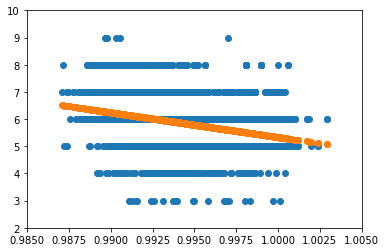

In [19]:
plt.scatter(wine_quality["density"],wine_quality["quality"])
plt.scatter(wine_quality["density"],predicted_quality)
plt.xlim(0.985,1.005)
plt.ylim(2,10)
plt.show()

In [20]:
from scipy.stats.stats import pearsonr

In [21]:
density_quality_corr = pearsonr(wine_quality["density"],wine_quality["quality"])[0]

print(density_quality_corr)

-0.307123312735


Now that we know how to make a regression line manually, let's look at an easier way to do it, using a function from scipy.

The **linregress** function makes it simple to do linear regression.

Now that we know a simpler way to do linear regression, let's look at how to figure out if our regression is good or bad.
* We can plot out our line and our actual values, and see how far apart they are on the y-axis.
* We can also compute the distance between each prediction and the actual value -- these distances are called residuals.

If we add up the sum of the squared residuals, we can get a good error estimate for our line.

We have to add the squared residuals, because just like differences from the mean, the residuals add to 0 if they aren't squared.

To put it in math terms, the sum of squared residuals is:

$\Large\sum\limits_{i=1}^n{(y_{i} - \hat{y}_{i})^2}$

The variable $\Large\hat{y}_{i}$ is the predicted y value at position i.

In [22]:
from scipy.stats import linregress

In [23]:
# We've seen the r_value before 
# -- we'll get to what p_value and stderr_slope are soon --
# for now, don't worry about them.
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])

# As you can see, these are the same values we calculated (except for slight rounding differences)
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(stderr_slope)

-90.9423999421
96.2771445761
-0.307123312735
1.72798787117e-107
4.02734817895


In [24]:
# Using the given slope and intercept, calculate the predicted y values.
predicted_wine_quality = wine_quality["density"]*slope+intercept

# Subtract each predicted y value from the corresponding actual y value, square the difference,
# and add all the differences together.
# This will give you the sum of squared residuals. Assign this value to rss.
rss = sum((wine_quality["quality"]-predicted_wine_quality)**2)

print(rss)

3478.68946969


From the sum of squared residuals, we can find the **standard error**. The standard error is similar to the standard deviation, but it tries to make an estimate for the whole population of y-values -- even the ones we haven't seen yet that we may want to predict in the future.

The standard error lets us quickly determine how good or bad a linear model is at prediction.

The equation for standard error is $\Large\sqrt{\frac{RSS}{n - 2}}$.

You take the sum of squared residuals, divide by the number of y-points minus two, and then take the square root.

You might be wondering about why 2 is subtracted -- this is due to differences between the whole population and a sample. This will be explained in more depth later on.

In [25]:
# We can do our linear regression
# Sadly, the stderr_slope isn't the standard error, but it is the standard error of the slope fitting only
# We'll need to calculate the standard error of the equation ourselves

# Calculate the standard error using the above formula.
std_err = (rss/(len(wine_quality["quality"])-2))**0.5

# Calculate what proportion of actual y values are within 1 standard error of the predicted y value.
# Assign the result to within_one.
def within_percentage(y, predicted_y, stderr, error_count):
    differences = abs(predicted_y - y)
    lower_differences = [d for d in differences if d <= stderr * error_count]
    return len(lower_differences) / len(y)

within_one = within_percentage(wine_quality["quality"], predicted_wine_quality, std_err, 1)

# Calculate what proportion of actual y values are within 2 standard errors of the predicted y value.
# Assign the result to within_two.
within_two = within_percentage(wine_quality["quality"], predicted_wine_quality, std_err, 2)

# Calculate what proportion of actual y values are within 3 standard errors of the predicted y value.
# Assign the result to within_three.
within_three = within_percentage(wine_quality["quality"], predicted_wine_quality, std_err, 3)

# Assume that "within" means "up to and including",
# so be sure to count values that are exactly 1, 2, or 3 standard errors away.
print(within_one)
print(within_two)
print(within_three)

0.6845651286239282
0.9356880359330338
0.9936708860759493
